## Initialization

INTRODUCTION
We will be analyzing two prepaid plans for Megaline, a telecom operator. As we analyze both plans, we will check for signaficant behavior differences, if any. Through our analysis, we should be able to determine if one plan more profitbale than the other.

In [4]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

In [5]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('megaline_calls.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_msg = pd.read_csv('megaline_messages.csv')
df_plans = pd.read_csv('megaline_plans.csv')
df_users = pd.read_csv('megaline_users.csv')



## Plans

In [6]:
# Print the general/summary information about the plans' DataFrame
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
# Print a sample of data for plans
print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


This looks fine to me. 
Note: (1GB = 1,024MB)

## Users

In [8]:
# Print the general/summary information about the users' DataFrame
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Print a sample of data for users
print(df_users.sample(n=7))

     user_id first_name  last_name  age  \
262     1262  Michelina   Hamilton   34   
379     1379    Jarrett    Spencer   34   
0       1000   Anamaria      Bauer   45   
407     1407    Tristan  Daugherty   27   
124     1124     Jenell    Navarro   48   
228     1228       Jude       Hale   26   
68      1068     Marcel    Jimenez   47   

                                          city    reg_date      plan  \
262        Dallas-Fort Worth-Arlington, TX MSA  2018-02-09      surf   
379              Grand Rapids-Kentwood, MI MSA  2018-10-18      surf   
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
407  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-11-29  ultimate   
124                  New Haven-Milford, CT MSA  2018-02-19  ultimate   
228            Detroit-Warren-Dearborn, MI MSA  2018-04-15      surf   
68   New York-Newark-Jersey City, NY-NJ-PA MSA  2018-01-29      surf   

    churn_date  
262        NaN  
379        NaN  
0          NaN  
407       

"reg_date" should be coverted to datetime datatype. 
"churn_date" has alot of empty value. Since we don't need it for this analysis, best to drop it.

### Fix Data

In [10]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

#checking if data is now correct
df_users.info()
print(df_users.sample(n=7))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
     user_id first_name last_name  age  \
340     1340      Vanna   Stanton   65   
63      1063   Larhonda   Hartman   60   
433     1433     Lyndon  Morrison   29   
151     1151      Ralph    Monroe   21   
237     1237   Leighann   Wheeler   50   
154     1154   Humberto    Pruitt   53   
419     1419      Bryon    Gordon   45   

         

### Enrich Data

In [11]:
df_users = df_users.drop('churn_date', axis=1)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 27.5+ KB


## Calls

In [12]:
# Print the general/summary information about the calls' DataFrame
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Print a sample of data for calls
print(df_calls.sample(n=7))

              id  user_id   call_date  duration
77995   1279_123     1279  2018-12-22      4.69
115842   1406_68     1406  2018-06-08     18.95
107477    1382_5     1382  2018-09-22      0.00
42407    1156_12     1156  2018-05-30      4.43
110281  1389_341     1389  2018-11-15      2.35
81985   1295_413     1295  2018-08-16      8.88
34325   1127_146     1127  2018-10-30      0.00


'call_date' should be DateTime datatype. We should create a month colum, since we will be analyzing data by month.
Also, we need to round up the duration of each call.

### Fix data

In [14]:
#changing to datatime datatype
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

#creating a new column extracting the month for eacb call
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

#checking if data is correct
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


### Enrich data

creating a new column rounding up the call durations is better than altering the existing duration column. Rather not lose that data.

In [15]:
df_calls['duration_up']= df_calls['duration'].apply(np.ceil).astype('int')

print(df_calls.sample(n=7))

#checking to make sure the data changes are correct
df_calls.info()

              id  user_id  call_date  duration  month  duration_up
19276    1073_92     1073 2018-06-14      3.91      6            4
67367   1241_203     1241 2018-12-31      0.00     12            0
27757     1106_2     1106 2018-12-23      7.28     12            8
88756   1324_814     1324 2018-07-25      0.00      7            0
85192   1313_172     1313 2018-07-18      0.52      7            1
76121   1268_625     1268 2018-06-17      3.00      6            3
119817  1417_490     1417 2018-07-13      4.13      7            5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           137735 non-null  object        
 1   user_id      137735 non-null  int64         
 2   call_date    137735 non-null  datetime64[ns]
 3   duration     137735 non-null  float64       
 4   month        137735 non-null  int64         
 5  

## Messages

In [16]:
# Print the general/summary information about the messages' DataFrame
df_msg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Print a sample of data for messages
print(df_msg.sample(n=7))


              id  user_id message_date
65654    1422_59     1422   2018-10-23
31170    1195_37     1195   2018-12-15
55816   1352_157     1352   2018-12-14
62992    1399_57     1399   2018-10-13
4473    1043_761     1043   2018-07-30
48329  1324_1063     1324   2018-12-05
52309   1336_277     1336   2018-06-16


message_date should be datetime datatype

### Fix data

all dates should be datetime datatype

In [18]:
df_msg['message_date'] = pd.to_datetime(df_msg['message_date'], format='%Y-%m-%d')


### Enrich data

Once again since we'll be analyzing by month, we should add month column.

In [19]:
df_msg['month'] = pd.DatetimeIndex(df_msg['message_date']).month

df_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


## Internet

In [20]:
# Print the general/summary information about the internet DataFrame
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Print a sample of data for the internet traffic
print(df_internet.sample(n=7))


             id  user_id session_date  mb_used
3545   1020_146     1020   2018-12-10   513.79
91257  1420_150     1420   2018-11-01     0.00
28392  1130_177     1130   2018-11-30   364.42
40808  1182_594     1182   2018-11-23  1037.23
2055   1010_226     1010   2018-05-07   177.68
70799   1331_50     1331   2018-09-25   784.38
11939   1059_38     1059   2018-12-04   320.16


### Fix data

session_date should be datetime datatype

In [22]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

### Enrich data

Once again since we'll be analyzing by month, we should add month column.

In [23]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [24]:
# Print out the plan conditions and make sure they are clear for you

print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [25]:
# Calculate the number of calls made by each user per month. Save the result.
df_calls_per_user = df_calls.groupby(['user_id','month'])['duration_up'].count()
print(df_calls_per_user.head(10))


user_id  month
1000     12        16
1001     8         27
         9         49
         10        65
         11        64
         12        56
1002     10        11
         11        55
         12        47
1003     12       149
Name: duration_up, dtype: int64


In [26]:
# Calculate the amount of minutes spent by each user per month. Save the result.
df_minutes_per_user = df_calls.groupby(['user_id','month'])['duration_up'].sum()
print(df_minutes_per_user.head(10))


user_id  month
1000     12        124
1001     8         182
         9         315
         10        393
         11        426
         12        412
1002     10         59
         11        386
         12        384
1003     12       1104
Name: duration_up, dtype: int64


In [27]:
# Calculate the number of messages sent by each user per month. Save the result.
df_msgs_per_users = df_msg.groupby(['user_id','month'])['message_date'].count()
print(df_msgs_per_users.head(10))

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
         12       44
1002     10       15
         11       32
         12       41
1003     12       50
Name: message_date, dtype: int64


In [28]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
df_internet_per_users = df_internet.groupby(['user_id','month'])['mb_used'].sum()
print(df_internet_per_users.head(10))

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
         12       19369.18
1002     10        6552.01
         11       19345.08
         12       14396.24
1003     12       27044.14
Name: mb_used, dtype: float64


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [29]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
df_concat = pd.concat([df_calls_per_user,df_minutes_per_user,df_msgs_per_users, df_internet_per_users], axis=1)

#rename columns
df_concat.columns = ['total_calls_per_user', 'total_mins_per_user', 'total_msgs_per_user','total_mb_per_user']

#change indices to columns
df_concat.reset_index(inplace=True)

#sort by user_id then month
df_concat.sort_values(by = ['user_id', 'month'])

print(df_concat.head(10))

   user_id  month  total_calls_per_user  total_mins_per_user  \
0     1000     12                  16.0                124.0   
1     1001      8                  27.0                182.0   
2     1001      9                  49.0                315.0   
3     1001     10                  65.0                393.0   
4     1001     11                  64.0                426.0   
5     1001     12                  56.0                412.0   
6     1002     10                  11.0                 59.0   
7     1002     11                  55.0                386.0   
8     1002     12                  47.0                384.0   
9     1003     12                 149.0               1104.0   

   total_msgs_per_user  total_mb_per_user  
0                 11.0            1901.47  
1                 30.0            6919.15  
2                 44.0           13314.82  
3                 53.0           22330.49  
4                 36.0           18504.30  
5                 44.0         

In [30]:
# Add the plan information
df_merged = df_concat.merge(df_users, on = 'user_id', how='left')
df_merged = df_merged.drop(['first_name','last_name','age','reg_date'], axis='columns') #we don't need this data

df_merged = df_merged.replace(np.nan, 0) #replace missing values with zero
df_merged['total_calls_per_user'] = df_merged['total_calls_per_user'].astype('int')
df_merged['total_mins_per_user'] = df_merged['total_mins_per_user'].astype('int')
df_merged['total_msgs_per_user'] = df_merged['total_msgs_per_user'].astype('int')

df_merged.info()
print(df_merged.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2293 non-null   int64  
 1   month                 2293 non-null   int64  
 2   total_calls_per_user  2293 non-null   int64  
 3   total_mins_per_user   2293 non-null   int64  
 4   total_msgs_per_user   2293 non-null   int64  
 5   total_mb_per_user     2293 non-null   float64
 6   city                  2293 non-null   object 
 7   plan                  2293 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 161.2+ KB
   user_id  month  total_calls_per_user  total_mins_per_user  \
0     1000     12                    16                  124   
1     1001      8                    27                  182   
2     1001      9                    49                  315   
3     1001     10                    65                  393   


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [31]:
# Calculate the monthly revenue for each user

def revenue (total_mins,total_msgs,total_mb,plan):
    if plan == 'surf':
        rev = 20
        if total_mins > 500:
            rev += (total_mins - 500) * .03
        if total_msgs > 50:
            rev += (total_msgs - 50) * .03
        if total_mb > 15000:
            rev += np.ceil((total_mb - 15360)/1024) * 10
        return rev
    else:
        rev = 70
        if total_mins > 3000:
            rev += (total_mins - 3000) * .01
        if total_msgs > 1000:
            rev += (total_msgs - 1000) * .01
        if total_mb > 30000:
            rev += np.ceil((total_mb - 30720)/1024) * 7
        return rev
            
            
df_merged['revenue'] = df_merged.apply(lambda x: revenue(x['total_mins_per_user'], x['total_msgs_per_user'], x['total_mb_per_user'], x['plan']), axis=1)


df_merged.info()
print(df_merged.head(6))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2293 non-null   int64  
 1   month                 2293 non-null   int64  
 2   total_calls_per_user  2293 non-null   int64  
 3   total_mins_per_user   2293 non-null   int64  
 4   total_msgs_per_user   2293 non-null   int64  
 5   total_mb_per_user     2293 non-null   float64
 6   city                  2293 non-null   object 
 7   plan                  2293 non-null   object 
 8   revenue               2293 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 179.1+ KB
   user_id  month  total_calls_per_user  total_mins_per_user  \
0     1000     12                    16                  124   
1     1001      8                    27                  182   
2     1001      9                    49                  315   
3     1001   

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

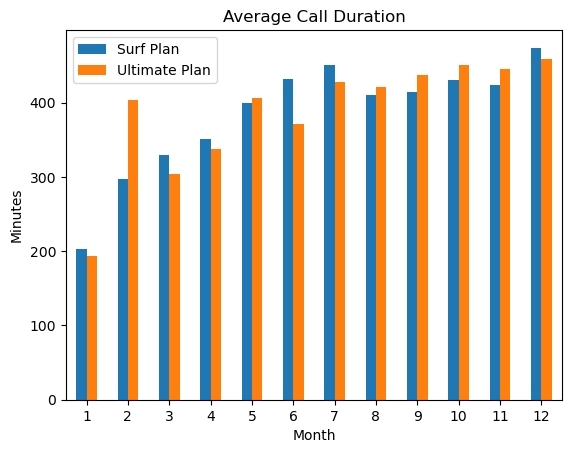

In [32]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
df_surf = df_merged.query("plan == 'surf'")
df_ultimate = df_merged.query("plan == 'ultimate'")

df_surf_calls_dur = df_surf.groupby('month')['total_mins_per_user'].mean()
df_ultimate_calls_dur = df_ultimate.groupby('month')['total_mins_per_user'].mean()

df_calls_dur_concat = pd.concat([df_surf_calls_dur, df_ultimate_calls_dur], axis=1)
df_calls_dur_concat.columns = ['avg_min_surf','avg_min_surf']

df_calls_dur_concat.plot(
        kind='bar',
        title='Average Call Duration',
        xlabel='Month',
        ylabel='Minutes',rot=0)
plt.legend(['Surf Plan', 'Ultimate Plan'])


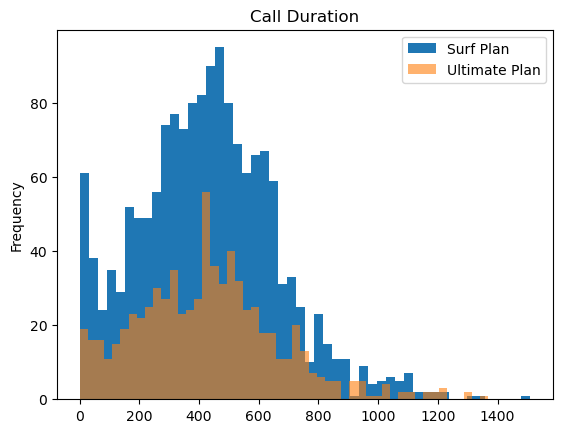

In [33]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
df_surf['total_mins_per_user'].plot(kind='hist', bins=50, title = 'Call Duration', ylabel='Frenquency')
df_ultimate['total_mins_per_user'].plot(kind='hist',alpha =.6,bins=50)
plt.legend(["Surf Plan", "Ultimate Plan"]);
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [34]:
# Calculate the mean and the variance of the monthly call duration

print(df_surf['total_mins_per_user'].mean())
print(df_ultimate['total_mins_per_user'].mean())
print()

print(np.var(df_surf['total_mins_per_user']))
print(np.var(df_ultimate['total_mins_per_user']))
print()

print(np.std(df_surf['total_mins_per_user']))
print(np.std(df_ultimate['total_mins_per_user']))
print()

428.7495232040687
430.45

54933.33459131747
57764.12527777776

234.37861376695074
240.34168443650753



<AxesSubplot:title={'center':'total_mins_per_user'}, xlabel='month'>

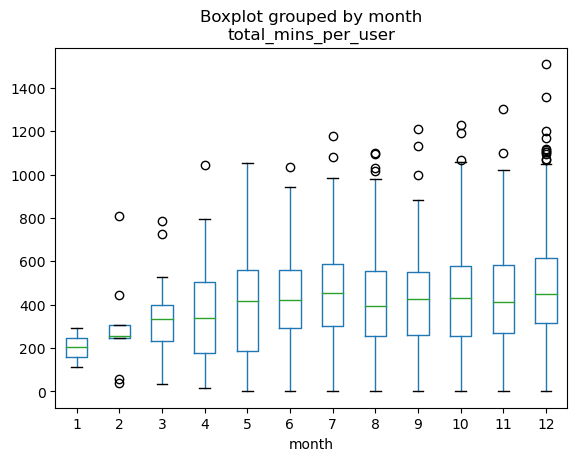

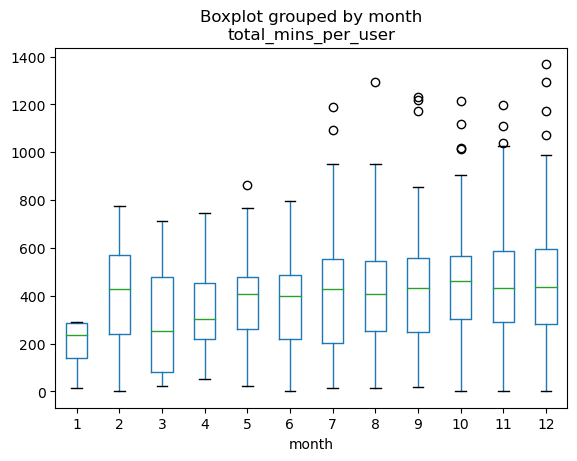

In [36]:
# Plot a boxplot to visualize the distribution of the monthly call duration

df_surf.boxplot(by ='month', column =['total_mins_per_user'], grid = False)
df_ultimate.boxplot(by ='month', column =['total_mins_per_user'], grid = False)


The MEDIAN call time between the two plans seem to be somewhat similar. BUT there are more outliers in the Ultimate plan. There's more users in the ultimate plan, whose call durations are MUCH higher.

### Messages

In [ ]:
# Compare the number of messages users of each plan tend to send each month

print(df_surf['total_msgs_per_user'].mean())
print(df_ultimate['total_msgs_per_user'].mean())
print()

print(np.var(df_surf['total_msgs_per_user']))
print(np.var(df_ultimate['total_msgs_per_user']))
print()

print(np.std(df_surf['total_msgs_per_user']))
print(np.std(df_ultimate['total_msgs_per_user']))

31.15956770502225
37.55138888888889

1126.0082317266622
1207.0779147376543

33.556046127734746
34.743026850544474


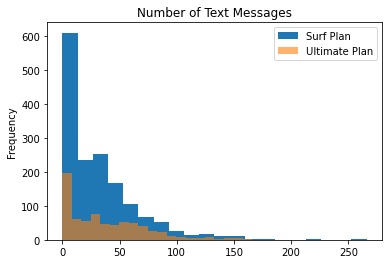

In [ ]:
df_surf['total_msgs_per_user'].plot(kind='hist', bins=20, title = 'Number of Text Messages', ylabel='Frenquency')
df_ultimate['total_msgs_per_user'].plot(kind='hist',alpha =.6,bins=20)
plt.legend(["Surf Plan", "Ultimate Plan"]);
plt.show()

       avg_msg_surf  avg_msg_ultimate
month                                
1                10                15
2                12                21
3                15                20
4                17                22
5                24                32
6                25                29
7                27                32
8                28                38
9                30                37
10               33                39
11               32                38
12               38                45


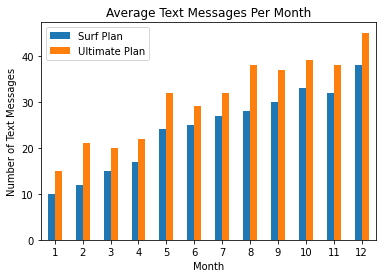

In [ ]:
df_surf_msg = df_surf.groupby('month')['total_msgs_per_user'].mean().astype(int)
df_ultimate_msg = df_ultimate.groupby('month')['total_msgs_per_user'].mean().astype(int)

df_avg_msg = pd.concat([df_surf_msg, df_ultimate_msg], axis=1)
df_avg_msg.columns = ['avg_msg_surf','avg_msg_ultimate']
print(df_avg_msg)

df_avg_msg.plot(
        kind='bar',
        title='Average Text Messages Per Month',
        xlabel='Month',
        ylabel='Number of Text Messages',rot=0)
plt.legend(['Surf Plan', 'Ultimate Plan'])

Clearly users on the ultimate plan text significantly more. However, according to the histogram, a majority of users overall don't text much per month. There must be a few users on the Ulitmate Plan who text A LOT.

### Internet

In [ ]:
# Compare the amount of internet traffic consumed by users per plan
print(df_surf['total_mb_per_user'].mean())
print(df_ultimate['total_mb_per_user'].mean())
print()

print(np.var(df_surf['total_mb_per_user']))
print(np.var(df_ultimate['total_mb_per_user']))
print()

print(np.std(df_surf['total_mb_per_user']))
print(np.std(df_ultimate['total_mb_per_user']))

16558.283490146216
17214.699694444444

64175571.68301331
61566665.1386863

8010.965714757073
7846.442833455571


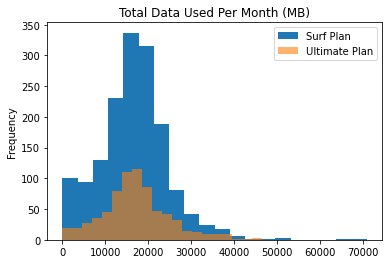

In [ ]:
df_surf['total_mb_per_user'].plot(kind='hist', bins=20, title = 'Total Data Used Per Month (MB)', ylabel='Frenquency')
df_ultimate['total_mb_per_user'].plot(kind='hist',alpha =.6,bins=20)
plt.legend(["Surf Plan", "Ultimate Plan"]);
plt.show()

       avg_mb_surf  avg_mb_ultimate
month                              
1             4874             6918
2            12178            17128
3            13345            18321
4            11984            16121
5            13936            16624
6            15301            15337
7            16783            16344
8            16795            17814
9            16591            16969
10           17311            17612
11           16339            17033
12           18132            18323


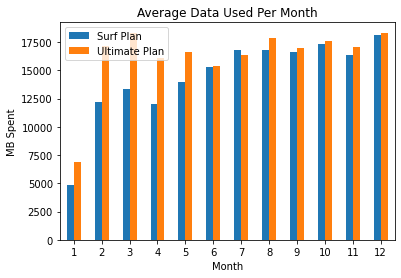

In [ ]:
df_surf_mb = df_surf.groupby('month')['total_mb_per_user'].mean().astype(int)
df_ultimate_mb = df_ultimate.groupby('month')['total_mb_per_user'].mean().astype(int)

df_avg_mb = pd.concat([df_surf_mb, df_ultimate_mb], axis=1)
df_avg_mb.columns = ['avg_mb_surf','avg_mb_ultimate']
print(df_avg_mb)

df_avg_mb.plot(
        kind='bar',
        title='Average Data Used Per Month',
        xlabel='Month',
        ylabel='MB Spent',rot=0)
plt.legend(['Surf Plan', 'Ultimate Plan'])


Seems in the first 5 months of the year, users of the Ultimate plan use more data. But overall, it's not very different. Even the mean and standard deviation between surf and ultimate plans are similar!

## Revenue

In [ ]:
print(df_surf['revenue'].mean().round(2))
print(df_ultimate['revenue'].mean().round(2))
print()

print(np.var(df_surf['revenue']).round(2))
print(np.var(df_ultimate['revenue']).round(2))
print()

print(np.std(df_surf['revenue']).round(2))
print(np.std(df_ultimate['revenue']).round(2))

60.71
72.31

3065.88
129.67

55.37
11.39


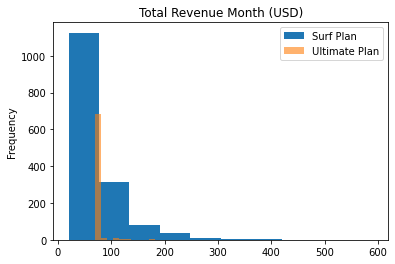

In [ ]:
df_surf['revenue'].plot(kind='hist', bins=10, title = 'Total Revenue Month (USD)', ylabel='Frenquency')
df_ultimate['revenue'].plot(kind='hist',alpha =.6,bins=10)
plt.legend(["Surf Plan", "Ultimate Plan"]);
plt.show()

       avg_rev_surf  avg_rev_ultimate
month                                
1             20.00             70.00
2             34.40             70.00
3             45.94             74.67
4             40.71             73.00
5             47.63             70.72
6             49.28             71.64
7             62.67             71.90
8             63.93             72.86
9             58.27             72.03
10            65.42             72.31
11            58.00             71.71
12            70.56             73.29


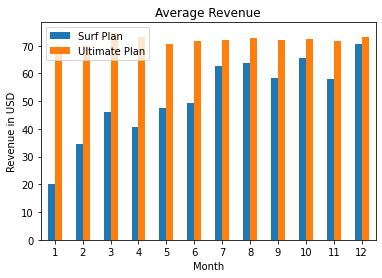

In [ ]:
df_surf_rev = df_surf.groupby('month')['revenue'].mean().round(2)
df_ultimate_rev = df_ultimate.groupby('month')['revenue'].mean().round(2)

df_avg_rev = pd.concat([df_surf_rev, df_ultimate_rev], axis=1)
df_avg_rev.columns = ['avg_rev_surf','avg_rev_ultimate']
print(df_avg_rev)

df_avg_rev.plot(
        kind='bar',
        title='Average Revenue',
        xlabel='Month',
        ylabel='Revenue in USD',rot=0)
plt.legend(['Surf Plan', 'Ultimate Plan'])

Clearly the Ultimate plan is more profitable, ESPECIALLY  in the first half of the year.
Based on the deviation of the surf plans, there's a couple users on the surf plan who would save signficant money by switching to the ultimate plan.

## Test statistical hypotheses

In [ ]:
# Test the hypotheses

#null hypothesis = the average revenue of the Ultimate and Surf plans are similar
#alternative hypothesis = the average revenue of the Ultimate and Surf plans are different

alpha = .05

results = st.ttest_ind(
    df_surf['revenue'], 
    df_ultimate['revenue'], equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")



p-value: 3.17039054811355e-15
We reject the null hypothesis


In [ ]:
# Test the hypotheses

#null hypothesis = the average revenue of users in the NY-NJ area is similar from that of the users from the other regions.
#alternative hypothesis = the average revenue of users in the NY-NJ area is different from that of the users from the other regions.

df_ny_nj = df_merged.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA'")
df_not_ny_nj = df_merged.query("city != 'New York-Newark-Jersey City, NY-NJ-PA MSA'")

results_2 = st.ttest_ind(
    df_ny_nj['revenue'], 
    df_not_ny_nj['revenue'])

print('p-value:', results_2.pvalue)

if results_2.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 0.043557431621342436
We reject the null hypothesis


We reject the null hypothesis, meaning we are in favor of the alternative hypostheis: the average revenue of users in the NY-NJ area is different from that of the users from the other regions.